In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
print(shap.__version__)


0.47.0


In [ ]:
Modle_Path=r'Model_Path'
with open(Modle_Path, 'rb') as f:
    M = pickle.load(f)
M

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


LGBMClassifier(colsample_by_tree=0.7884009024521283,
               learning_rate=0.015175408781248368, max_depth=21,
               n_estimators=700, num_leaves=48, reg_lambda=0.6803433268727449,
               subsample=0.2471551211320533)

In [42]:
X_NewName=[
  'NIR/Red','GSAVI','SWIR2/SWIR1','SWIR1/Green','B8A','NDVI','SWIR1/NIR','SWIR1/Red','NBR','B11','B12' ,'SAVI','SWIR2/Green','MSR','MSAVI'
,'SWIR2/NIR','B2','GDVI','B3','SWIR2/Red','NDII', 'B4' ,'B5', 'B6','Red/Green','B7' ,'DVI' ,'B8','CVI', 'NIR/Green','NDGI','GNDVI','CR','DPSVI','DPSVIo' ,'VH','VV'
,'B11*','B12*','B2*','B3*','B4*','B5*','B6*','B7*','B8*','B8A*'
,'CR*','CVI','DPSVI*','DPSVIo*','DVI','GDVI*','GNDVI*','GSAVI*'
,'MSAVI*','MSR*','NBR*','NDGI*','NDII*','NDVI*','(NIR/Green)*','(NIR/Red)*','(Red/Green)*','(SWIR1/Green)*','(SWIR1/NIR)*','(SWIR1/Red)*','(SWIR2/Green)*'
    ,'(SWIR2/NIR)*','(SWIR2/Red)*','SAVI*','VH*','VV*','(SWIR2/SWIR1)*','Median','Mean','STD','MAX','MIN','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
len(X_NewName)

89

In [44]:
pathDF=r'G:\1) Scientific Projects\2) Tree Species\3) Code\3) Code\FinalDS_Clean.csv'
df = pd.read_csv(pathDF)
X_OldName=['NR' ,'GSAVI' ,'SWIR21' ,'S1G', 'B8A' ,'NDVI', 'S1N',
 'S1R','NBR','B11','B12','SAVI','S2G','MSR','MSAVI',
 'S2N','B2','GDVII','B3','S2R' ,'NDII', 'B4' ,'B5', 'B6' ,'RG' ,'B7' ,'DVI' ,'B8',
 'CVI','NG','NDGI','GNDVI','CR','DPSVI','DPSVIo','Sigma0_VH','Sigma0_VV',
 'C_B11','C_B12','C_B2','C_B3','C_B4','C_B5','C_B6','C_B7','C_B8','C_B8A',
 'C_CR','C_CVI','C_DPSVI','C_DPSVIo','C_DVI','C_GDVII','C_GNDVI','C_GSAVI',
 'C_MSAVI','C_MSR','C_NBR','C_NDGI','C_NDII','C_NDVI','C_NG','C_NR' ,'C_RG',
 'C_S1G' ,'C_S1N' ,'C_S1R' ,'C_S2G' ,'C_S2N', 'C_S2R' ,'C_SAVI' ,'C_Sigma0_VH'
 ,'C_Sigma0_VV' ,'C_SWIR21','Median','Mean','STD','MAX','MIN','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']

XX=df[X_OldName]
XX

,NR,GSAVI,SWIR21,S1G,B8A,NDVI,S1N,S1R,NBR,B11,...,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,18.526739,0.593954,0.453592,5.265250,0.440767,0.893179,0.470160,8.548635,0.648774,0.193644,...,18.9,19.0,20.0,20.0,21.0,21.0,22.0,23.0,24.0,25
1,20.850943,0.592502,0.446866,4.864805,0.387933,0.905894,0.413239,8.537932,0.688414,0.167622,...,22.0,22.0,23.0,23.0,23.0,23.0,23.0,23.0,24.0,25
2,19.945640,0.605654,0.440426,4.761519,0.398078,0.901021,0.401142,7.881780,0.699643,0.169156,...,22.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,23.0,24
3,16.820724,0.541139,0.486547,3.689111,0.340744,0.881255,0.438768,7.276369,0.648975,0.165811,...,2.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5
4,18.913340,0.557265,0.439871,4.294588,0.427689,0.892244,0.463389,8.470448,0.661861,0.177122,...,19.0,19.0,19.0,19.0,20.0,20.0,20.0,20.0,20.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21054,16.719385,0.566047,0.455464,4.301752,0.416792,0.874571,0.440657,6.928330,0.666787,0.169277,...,17.0,17.0,17.0,18.0,18.0,18.0,18.0,18.0,18.0,18
21055,19.899582,0.601307,0.429765,3.448967,0.427033,0.897314,0.376490,7.427852,0.721449,0.170483,...,2.0,4.0,4.7,5.6,7.0,9.0,10.0,11.2,13.0,18
21056,19.116239,0.606214,0.412743,3.515900,0.437333,0.892475,0.358774,6.675862,0.742269,0.159667,...,15.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0,17
21057,16.274094,0.539047,0.430025,3.452425,0.397675,0.860789,0.406388,6.588813,0.702575,0.158775,...,25.0,25.0,25.0,26.0,26.0,26.0,27.0,27.0,27.0,27


In [49]:
explainer = shap.TreeExplainer(M)
# Compute SHAP values
shap_values = explainer.shap_values(XX,check_additivity=False)

c:\ProgramData\anaconda3\Lib\site-packages\shap\explainers\_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [52]:
print(np.shape(shap_values))

(21059, 89)


(21059, 89)


C:\Users\k\AppData\Local\Temp\ipykernel_11072\890195017.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='',loc='center right',fontsize=15)


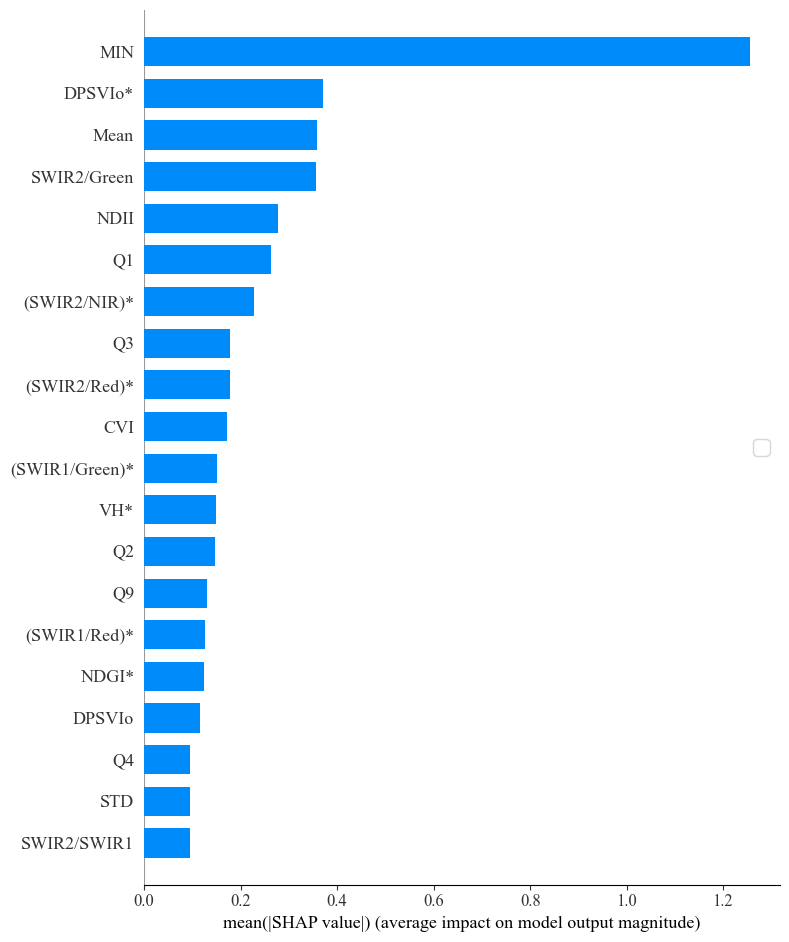

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
print(np.shape(shap_values))
shap.summary_plot(shap_values,XX,feature_names=X_NewName,class_names=list(M.classes_),show=False,plot_type='bar')
ax = plt.gca()
plt.legend(title='',loc='center right',fontsize=15)
plt.xticks(fontsize=12)
plt.show()


Index(['name', 'Importance', 'Category'], dtype='object')


C:\Users\k\AppData\Local\Temp\ipykernel_11072\3489051456.py:43: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=df_FI, x='name', y='Importance', hue='Category', errorbar=None, palette=palette,dodge=False, edgecolor=None)


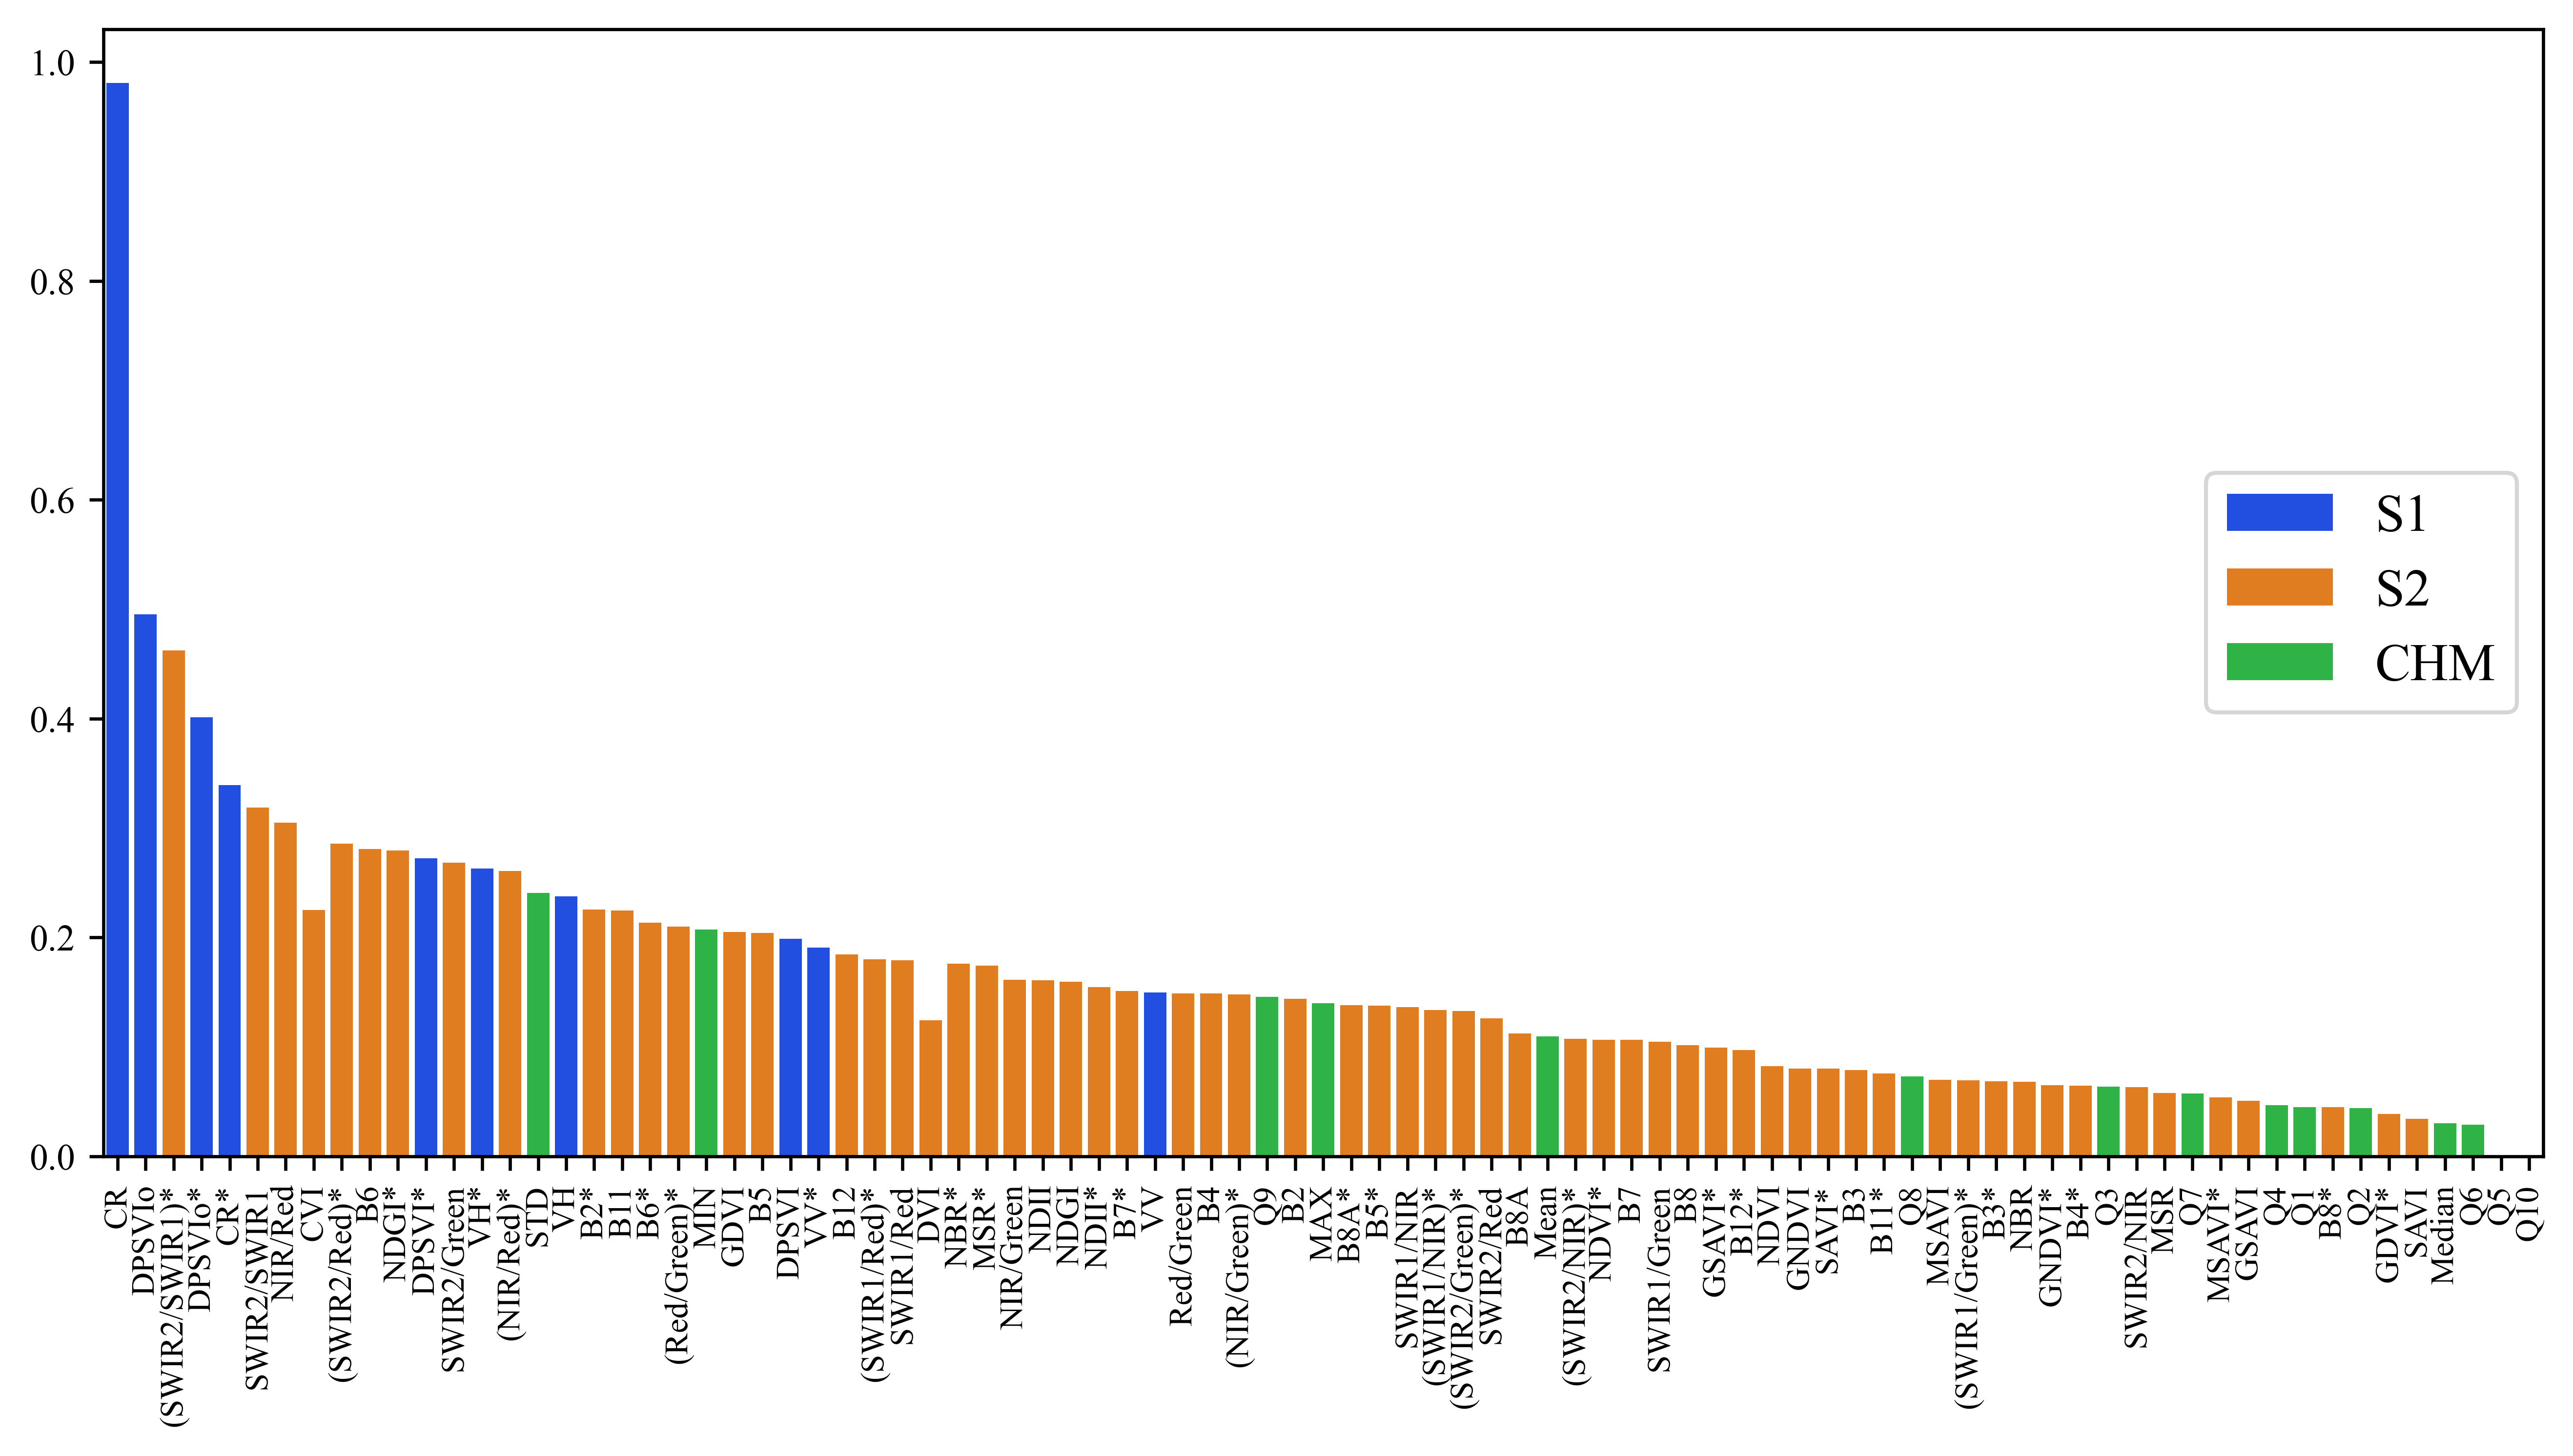

In [ ]:
feature_names = X_NewName  

shap_values_combined = np.mean(np.abs(shap_values), axis=2) # (21059, 89)
shap_importance = np.mean(np.abs(shap_values_combined), axis=0) 


sorted_idx = np.argsort(shap_importance)[::-1]  


df_FI = pd.DataFrame({'name': [feature_names[i] for i in sorted_idx], 'Importance': shap_importance[sorted_idx]})

# Classify Based Sensors
Hue_Featuer_Map = {
    'CHM': ['Median','Mean','STD','MAX','MIN','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'],
    'S1': ['VH*','VV*','CR','DPSVI','DPSVIo' ,'VH','VV','DPSVI*','DPSVIo*','CR*'],
    'S2': ['(SWIR2/NIR)*','(SWIR2/Red)*','SAVI*','(SWIR2/SWIR1)*','MSAVI*','MSR*','NBR*','NDGI*','NDII*','NDVI*','(NIR/Green)*','(NIR/Red)*','(Red/Green)*','(SWIR1/Green)*','(SWIR1/NIR)*','(SWIR1/Red)*','(SWIR2/Green)*',
           'CVI','DVI','GDVI*','GNDVI*','GSAVI*','B2*','B3*','B4*','B5*','B6*','B7*','B8*','B8A*','B11*','B12*',
           'SWIR2/NIR','B2','GDVI','B3','SWIR2/Red','NDII', 'B4' ,'B5', 'B6','Red/Green','B7' ,'DVI' ,'B8','CVI', 'NIR/Green','NDGI','GNDVI','NIR/Red','GSAVI','SWIR2/SWIR1','SWIR1/Green','B8A','NDVI','SWIR1/NIR','SWIR1/Red','NBR','B11','B12' ,'SAVI','SWIR2/Green','MSR','MSAVI']
}

#  
def get_category(name):
    for category, values in Hue_Featuer_Map.items():
        if name in values:
            return category
    return 'Unknown'  # Default category if not found

#     
df_FI['Category'] = df_FI['name'].apply(get_category)
print(df_FI.columns)
# Increase the size of the figure
plt.figure(figsize=(10.75, 5),dpi=600)

# Set the font to Times New Roman
plt.rc('font', family='Times New Roman')
palette = sns.color_palette('bright')  # You can choose any other palette
sns.barplot(data=df_FI, x='name', y='Importance', hue='Category', errorbar=None, palette=palette,dodge=False, edgecolor=None)
plt.legend(title='',loc='center right',fontsize=13)
# Remove the x and y labels
plt.xlabel('')
plt.ylabel('')

# Optionally, you can adjust the y-axis ticks (feature names) to be more readable
plt.xticks(rotation=90, fontsize=8) 
plt.yticks(fontsize=9)
plt.show()